In [1]:
from length_leaf import *
import numpy as np

Using TensorFlow backend.


In [100]:
data = np.load('LeafCounting/data/dataset_folder_5.npz', allow_pickle=True)

In [101]:
x = data['arr_0']

In [4]:
x.shape

(74, 240, 240, 3)

In [5]:
find_centroid(x[20])

(149, 128)

In [6]:
import matplotlib.pyplot as plt

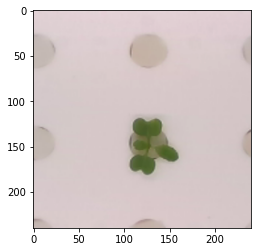

In [7]:
plt.imshow(x[20])

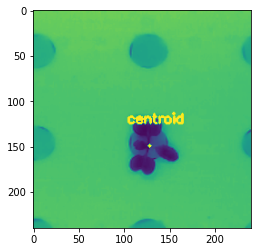

In [8]:
draw_centroid(x[20])

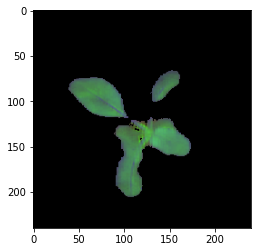

In [9]:
output,mask = extract_leaf(x[10])
plt.imshow(output)

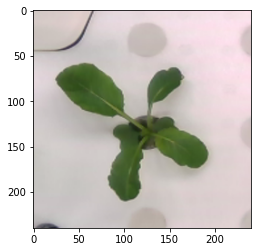

In [10]:
plt.imshow(x[12])

In [11]:
calculate_max_length_leaf(x[23])

48.104053883222775

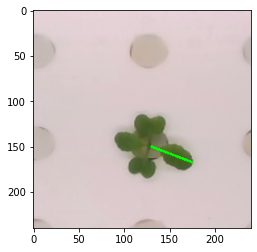

In [43]:
draw_centroid2tip(x[23])

In [13]:
test = load_image("C:/Users/Admin/Desktop/Thesis/ModelResults/Model v1/model.png", default_size)

In [14]:
draw_length_leaf("C:/Users/Admin/Desktop/Thesis/ModelResults/Model v1/model.png")

Invalid image!


In [15]:
draw_centroid(test)

Invalid image!


In [16]:
calculate_max_length_leaf(test)

0

In [17]:
length_leaf("C:/Users/Admin/Desktop/Thesis/ModelResults/Model v1/model.png")

0

In [18]:
centroid = find_centroid(x[20])

In [19]:
contours_pixels = find_contours(x[20])

In [20]:
centroid

(149, 128)

In [21]:
len(contours_pixels)

211

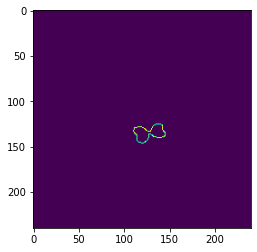

In [22]:
leaf_image, leaf_mask = extract_leaf(x[0])
edges = cv2.Canny(leaf_mask, 100, 1200)
plt.imshow(edges)

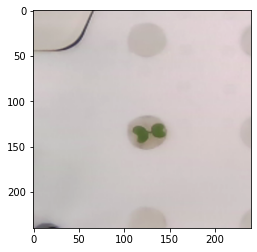

In [23]:
plt.imshow(x[0])

In [24]:
# boundaries for green color
boundaries = [
    # ([33, 80, 40], [105, 255, 255])
    ([33, 70, 40], [100, 255, 255])
]

(lower, upper) = boundaries[0]
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")

def remove_noises_mask_test(mask):
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
#     mask = cv2.erode(mask, element, iterations=1)
    mask = cv2.dilate(mask, element, iterations=1)
    mask = cv2.erode(mask, element)
    return mask

def extract_leaf_test(np_image):
    hsvIm = cv2.cvtColor(np_image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsvIm, lower, upper)
#     mask = remove_noises_mask_test(mask)
    output = cv2.bitwise_and(hsvIm, hsvIm, mask=mask)

    return output, mask

In [132]:
index = 10
test = x[index].copy()
leaf_image, leaf_mask = extract_leaf_test(x[index])
image = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(leaf_mask, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

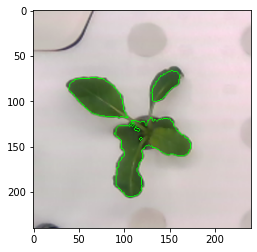

In [133]:
test = x[index].copy()
plt.imshow(cv2.drawContours(test, contours, -1, (0,255,0)))

In [134]:
def draw_point(np_image, point):
    cv2.circle(np_image, tuple(point), 1, (0, 255, 0), -1)   

In [135]:
tuple(contours[0][0][0])

(129, 118)

In [136]:
contours[0][0]

array([[129, 118]], dtype=int32)

In [137]:
test = x[index].copy()
for point in contours[0]:
    draw_point(test, point[0])

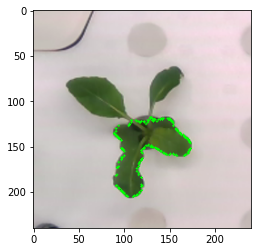

In [138]:
plt.imshow(test)

In [139]:
import math
lengths = []
for contour in contours:
    lengths_of_contour = []
    for pixel in contour:
        point = tuple(pixel[0])
        length = math.sqrt((centroid[0] - point[0])**2 + (centroid[1] - point[1])**2)
        lengths_of_contour.append(length)
    
    lengths.append(lengths_of_contour)

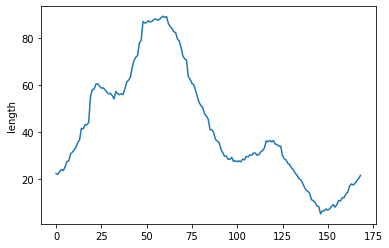

In [140]:
plt.plot(lengths[0])
plt.ylabel('length')
plt.show()

In [141]:
calculate_max_length_leaf(x[index])

83.48652585896721

In [142]:
idx = [i for i in range(len(lengths[0]))]

In [143]:
f = np.polynomial.chebyshev.Chebyshev.fit(idx, lengths[0],30)

In [144]:
f(200)

-27501660169.285988

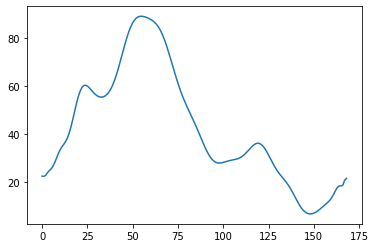

In [145]:
plt.plot([f(i) for i in idx])